In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

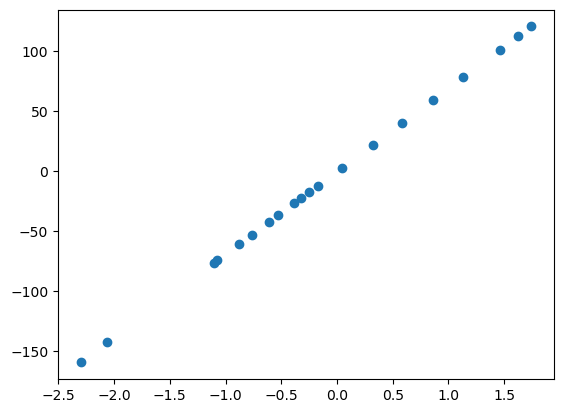

In [3]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [4]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    #Метод предсказания результата по факторам
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    #Функция ошибки - среднеквадратическое отклонение
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    #Метод градиентного спуска
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps): #Итерируемся максимум max_steps раз
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err/accuracy < 1:
                break #Завершаем обучение, если ошибка меньше нужной точности
        return steps, errors

In [5]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.009990408413528827


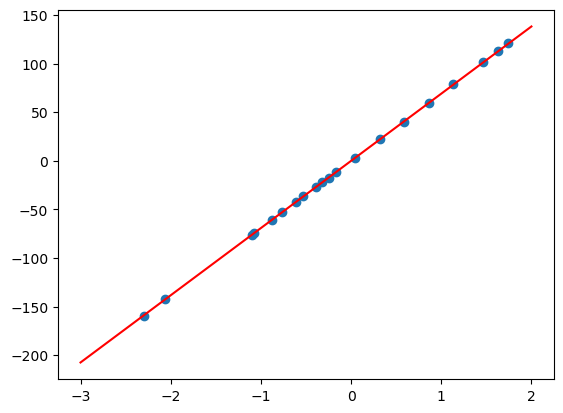

In [6]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

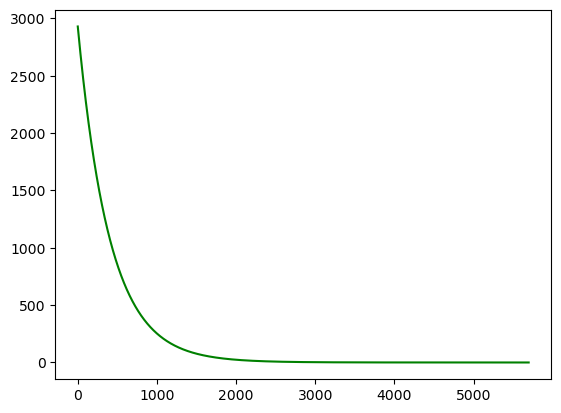

In [7]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [8]:
def check(alpha=0.001, accuracy=0.01, max_steps=10000):
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha, accuracy, max_steps)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)
    
    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()
    
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

error after gradient descent: 0.009990408413528827


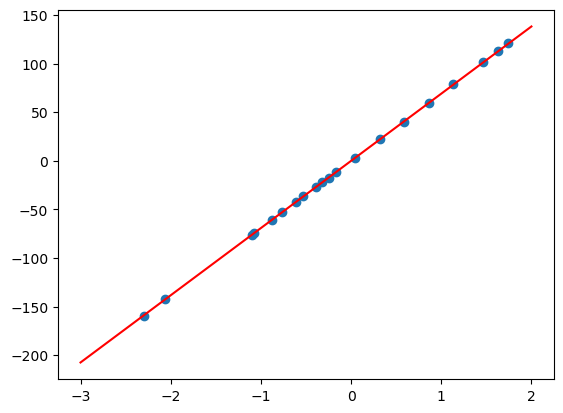

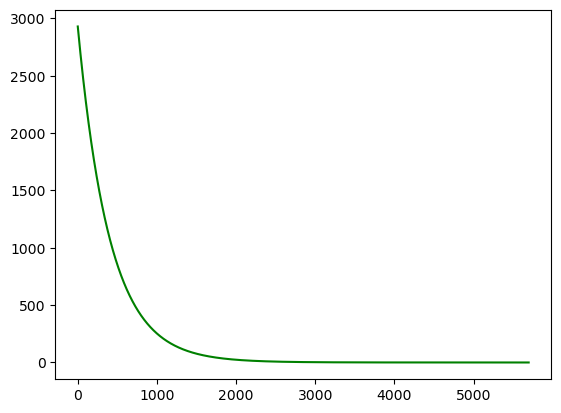

In [9]:
check()

# 1. Проверьте работу модели с разными начальными значениями параметров (accuracy, max_steps?). Убедитесь, что модель всегда сходится к оптимуму.

Первая проба (accuracy = 50, max_steps = 2000)

error after gradient descent: 49.960895036720466


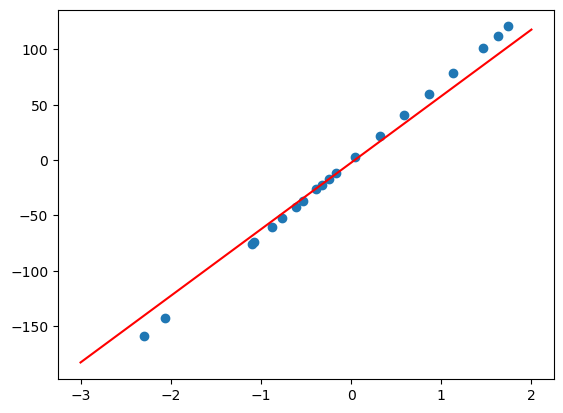

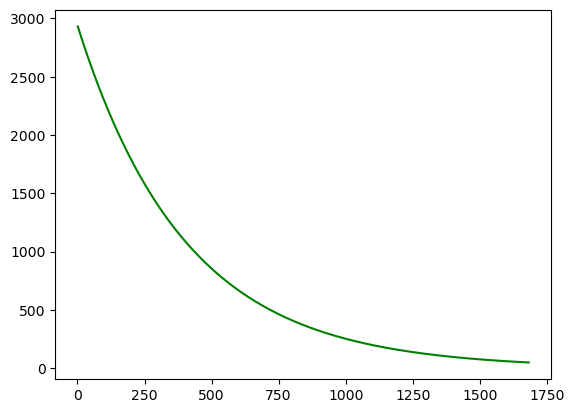

In [10]:
check(accuracy = 50, max_steps = 2000)

Вторая проба (accuracy = 1, max_steps = 5000)

error after gradient descent: 0.9991134745261627


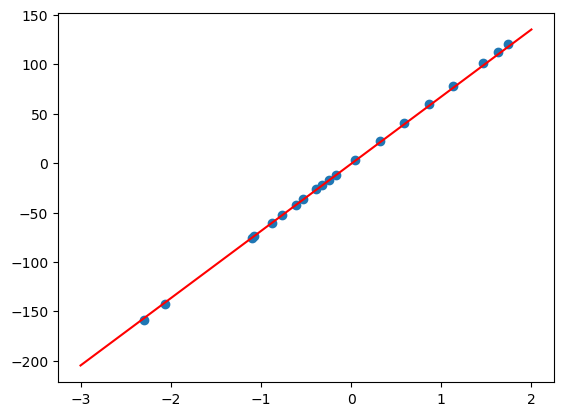

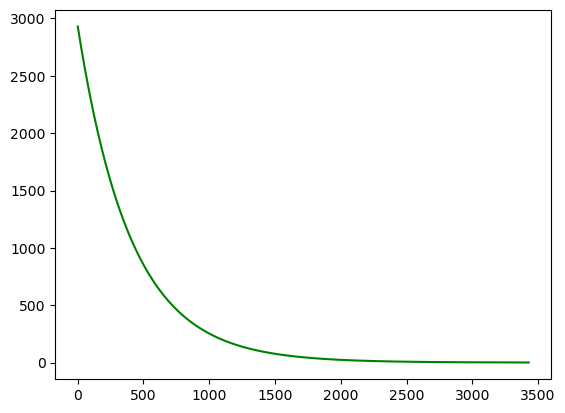

In [11]:
check(accuracy = 1, max_steps = 5000)

Третья проба (accuracy = 0.001, max_steps = 3000)

error after gradient descent: 2.5192498463855344


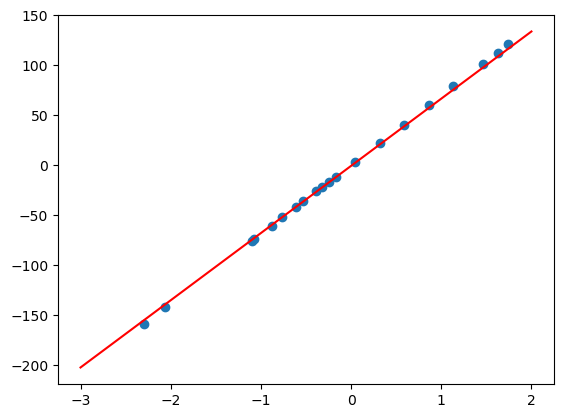

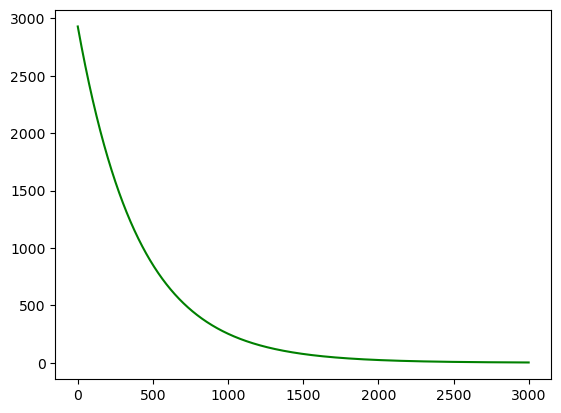

In [12]:
check(accuracy = 0.001, max_steps = 3000)

# 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

alpha = 0.5

error after gradient descent: 0.004432035208274048


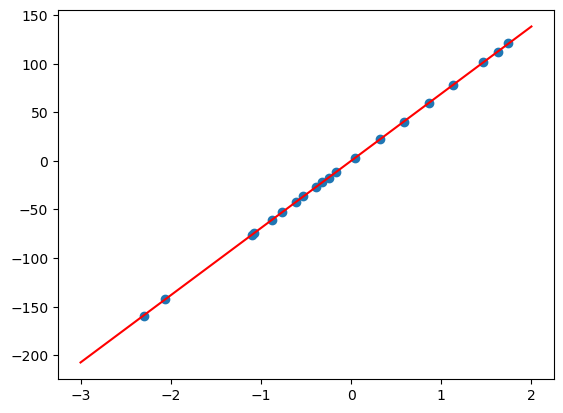

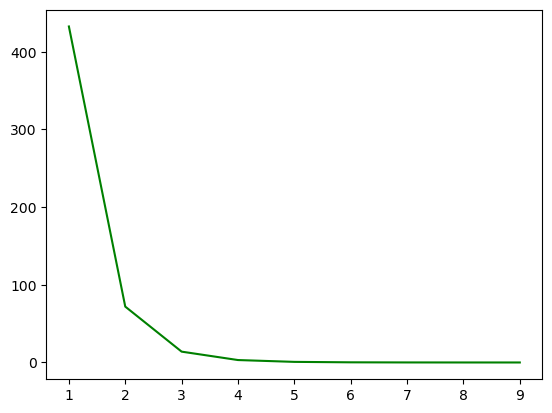

In [13]:
check(alpha = 0.5)

alpha = 1

error after gradient descent: 0.0008603627290350645


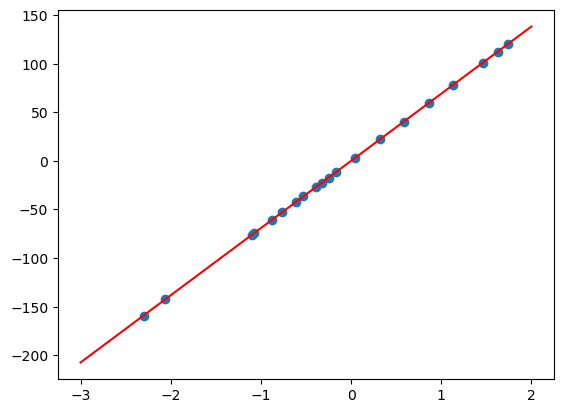

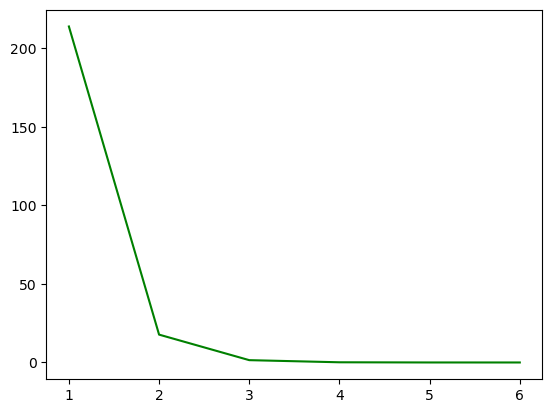

In [14]:
check(alpha = 1)

alpha = 1.5

error after gradient descent: 0.009034359504242662


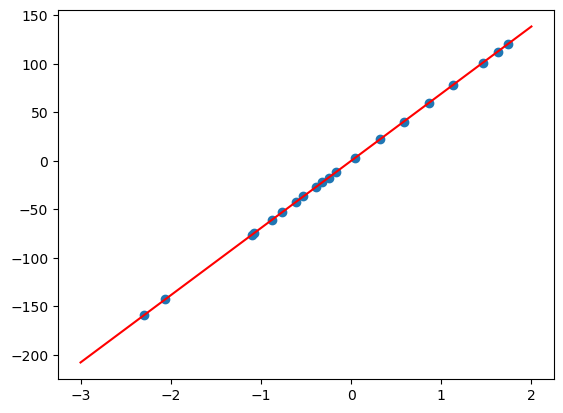

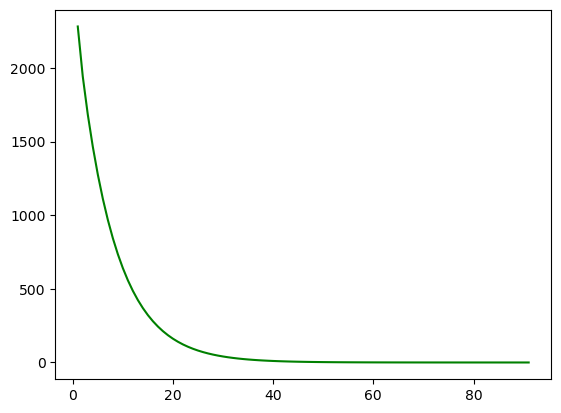

In [15]:
check(alpha = 1.5)

alpha = 1.55

error after gradient descent: 0.009982006900388871


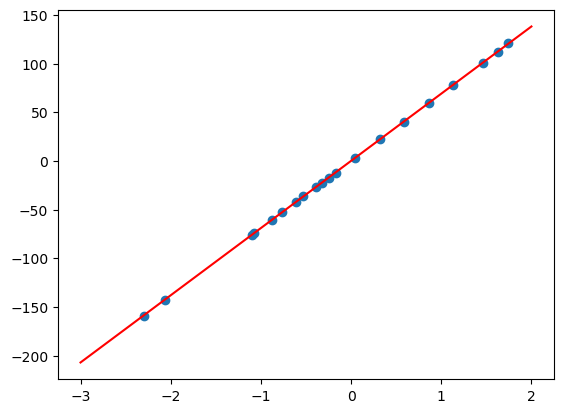

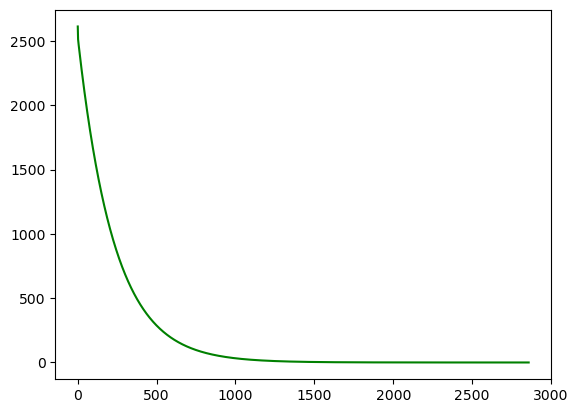

In [16]:
check(alpha = 1.55)

alpha = 1.56 (Нашли!)

error after gradient descent: 9.31577865643805e+95


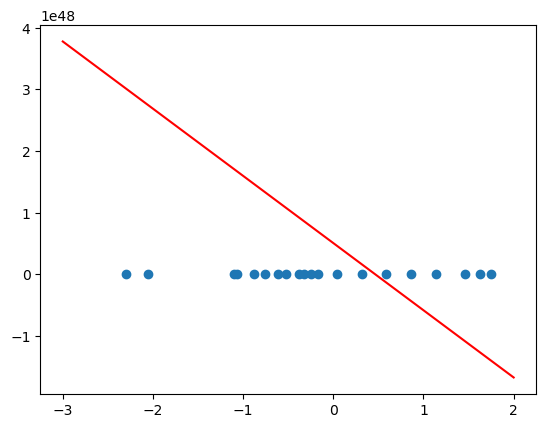

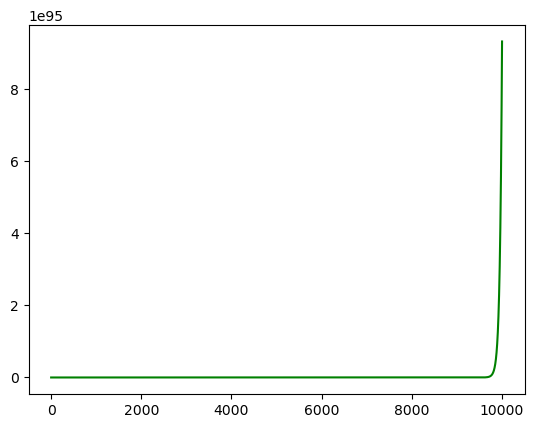

In [17]:
check(alpha = 1.56)

# 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [18]:
class Model_df(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    #Метод предсказания результата по факторам
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    #Функция ошибки - среднеквадратическое отклонение
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    #Метод градиентного спуска
    def fit(self, data, alpha=0.001, accuracy=0.01, max_steps=10000):
        #Начинаем вычленять данные из data
        if type(data) == type((1,)):
            X, Y = data[0], data[1]
        else:
            X, Y = data['x'], data['y']
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps): #Итерируемся максимум max_steps раз
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err/accuracy < 1:
                break #Завершаем обучение, если ошибка меньше нужной точности
        return steps, errors

In [19]:
def check_df(data = pd.DataFrame({'x': x, 'y': y}), alpha=0.001, accuracy=0.01, max_steps=10000):
    hyp = Model_df()
    steps, errors = hyp.fit(data, alpha, accuracy, max_steps)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)
    
    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()
    
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

error after gradient descent: 0.009990408413528827


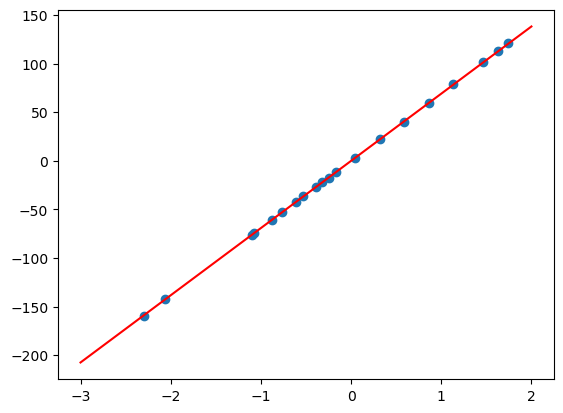

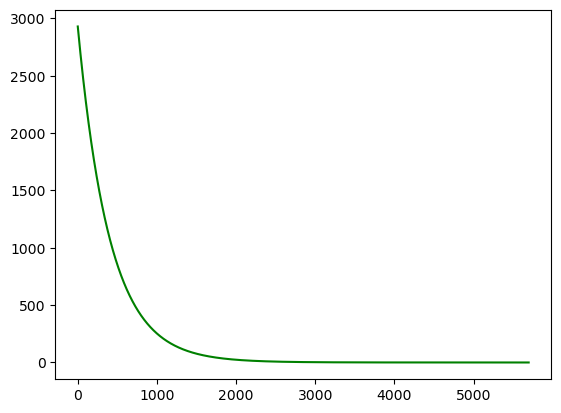

In [20]:
check_df()

error after gradient descent: 0.009990408413528827


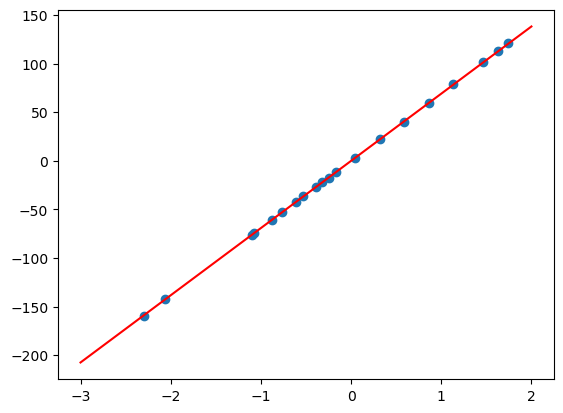

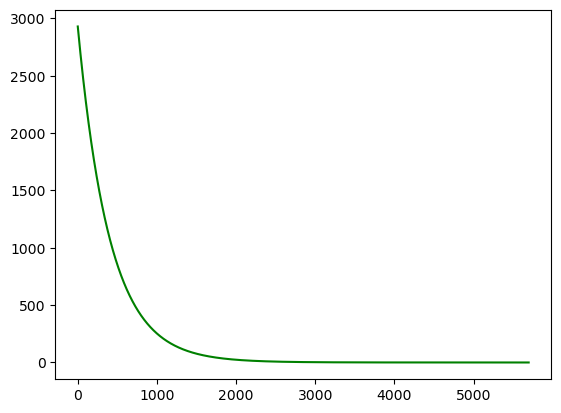

In [21]:
check_df(data = (x, y))

# 4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [22]:
#Смотрите начало работы

# 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [23]:
#Смотрите задание 1

# 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [24]:
class Model_adapt(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    #Метод предсказания результата по факторам
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    #Функция ошибки - среднеквадратическое отклонение
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    #Метод градиентного спуска
    def fit(self, data, alpha=2, accuracy=0.01, max_steps=10000):
        #Начинаем вычленять данные из data
        if type(data) == type((1,)):
            X, Y = data[0], data[1]
        else:
            X, Y = data['x'], data['y']
        steps, errors = [], []
        step = 0
        right_way = 0 #Флаг на правильный путь
        check_error = self.error(X,Y) #Вычисляем начальную ошибку
        for _ in range(max_steps): #Итерируемся максимум max_steps раз
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if (right_way == 0) and (check_error > new_err):
                right_way = 1 #Если ошибка начинает уменьшаться, то мы на правильном пути
            elif (right_way == 0) and (check_error < new_err):
                self.b0 += alpha * dJ0
                self.b1 += alpha * dJ1
                alpha = alpha//2 #Если ошибка увеличилась, то "откатываемся"
            else:
                pass #Иначе ничего не делаем - всё идёт по плану
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err/accuracy < 1:
                break #Завершаем обучение, если ошибка меньше нужной точности
        return steps, errors

In [25]:
def check_adapt(data = pd.DataFrame({'x': x, 'y': y}), alpha=2, accuracy=0.01, max_steps=10000):
    hyp = Model_adapt()
    steps, errors = hyp.fit(data, alpha, accuracy, max_steps)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)
    
    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()
    
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

error after gradient descent: 0.0008603627290350645


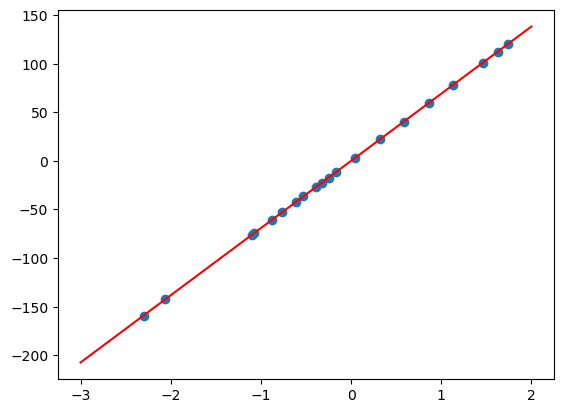

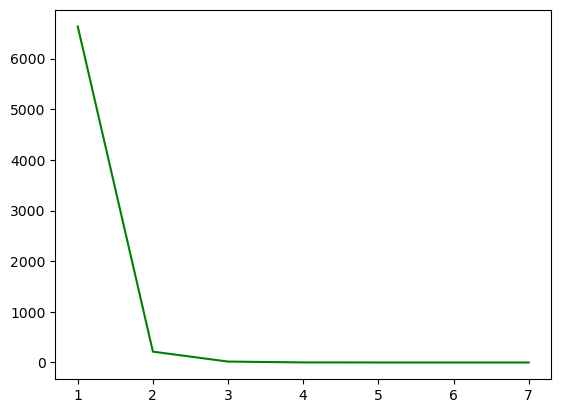

In [26]:
check_adapt()

error after gradient descent: nan


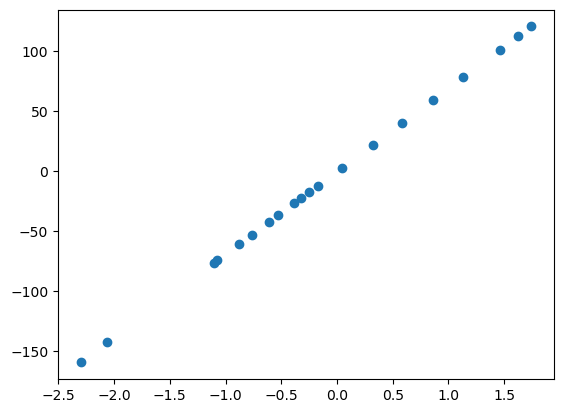

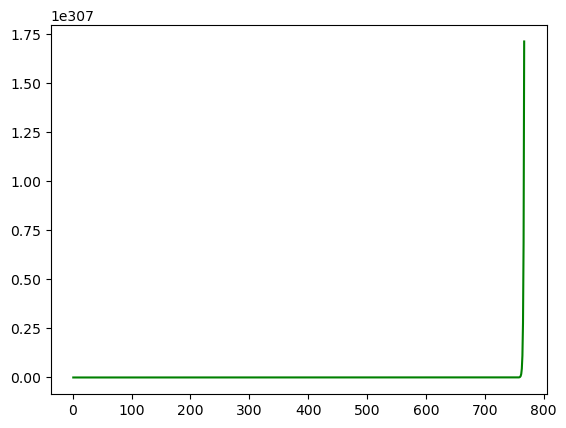

In [27]:
check(alpha = 2)

# 7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [28]:
class Model_plot(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    #Метод предсказания результата по факторам
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    #Функция ошибки - среднеквадратическое отклонение
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    #Метод градиентного спуска
    def fit(self, data, alpha=2, accuracy=0.01, max_steps=10000):
        #Начинаем вычленять данные из data
        if type(data) == type((1,)):
            X, Y = data[0], data[1]
        else:
            X, Y = data['x'], data['y']
        steps, errors = [], []
        step = 0
        right_way = 0 #Флаг на правильный путь
        check_error = self.error(X,Y) #Вычисляем начальную ошибку
        for _ in range(max_steps): #Итерируемся максимум max_steps раз
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            if (right_way == 0) and (check_error > new_err):
                right_way = 1 #Если ошибка начинает уменьшаться, то мы на правильном пути
            elif (right_way == 0) and (check_error < new_err):
                self.b0 += alpha * dJ0
                self.b1 += alpha * dJ1
                alpha = alpha//2 #Если ошибка увеличилась, то "откатываемся"
            else:
                pass #Иначе ничего не делаем - всё идёт по плану
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err/accuracy < 1:
                break #Завершаем обучение, если ошибка меньше нужной точности
        return steps, errors
    
    #Функция вывода
    def plot(self, data):
        check_adapt(data = data, alpha=0.001, accuracy=0.01, max_steps=10000)

error after gradient descent: 0.009990408413528827


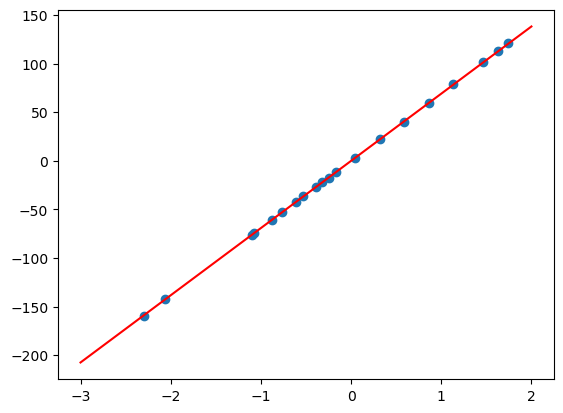

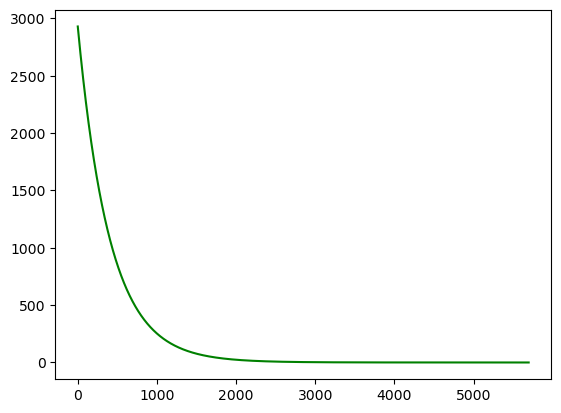

In [29]:
Hyp = Model_plot()
Hyp.plot((x, y))